# Performance Analysis of Awkward-array vs Numba optimized Awkward-array

## Content:
-  [Awkward array package](#Awkward-Array)
    -  [Profilling of Awkward package](#[Profilling-of-Awkward-package])
        -  [Using %%timeit](#Awkward-Array-Using-%%timeit)
        -  [Using cProfile](#Awkward-Array-Using-cProfile)
        -  [Using LineProfile](#Awkward-Array-Using-LineProfile)
  <br>
  <br>
- [Awkward Numba package](#Awkward-Array-Numba)
    -  [Profilling of Awkward Numba package](#Profilling-of-Awkward-Numba-package)
        -  [Using %%timeit](#Awkward-Array-Numba-Using-%%timeit)
        -  [Using cProfile](#Awkward-Array-Numba-Using-cProfile)
        -  [Using LineProfile](#Awkward-Array-Numba-Using-LineProfile)
  
  
- [Speed Difference at a glance](#Speed-Difference-at-a-glance)



- [Helper Functions used](#Helper-Functions-used)


## Awkward Array  
##### Awkward-array is a pure Python+Numpy library for manipulating complex data structures as you would Numpy arrays. Even if your data structures
 

In [28]:
import awkward
from awkward import JaggedArray

In [5]:
array = awkward.fromiter([[1.1, 2.2, None, 3.3, None],
                          [4.4, [5.5]],
                          [{"x": 6, "y": {"z": 7}}, None, {"x": 8, "y": {"z": 9}}]
                         ])
print("array = ",array, "\ntype: ",type(array))

array =  [[1.1 2.2 None 3.3 None] [4.4 [5.5]] [<Row 0> None <Row 1>]] 
type:  <class 'awkward.array.jagged.JaggedArray'>


In [8]:
array.tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

In [9]:
array[:, :2]

<JaggedArray [[1.1 2.2] [4.4 [5.5]] [<Row 0> None]] at 0x01e74d8d08d0>

### Awkward Array package performance on large arrays
-  [Using %%timeit](#Awkward-Array-Using-%%timeit)
-  [Using cProfile](#Awkward-Array-Using-cProfile)
-  [Using LineProfile](#Awkward-Array-Using-LineProfile)

#### Awkward-Array-Using-%%timeit

In [5]:
%%timeit
benchmark_no_numba()

<HDF5 file "dataset5311291.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901


C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


<HDF5 file "dataset5840697.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset6507145.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset6842096.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset7619309.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset1953007.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset921648.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset4962066.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
1min 18s ± 4.86 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
time_no_numba = %timeit -o benchmark_no_numba()

357 ms ± 49.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
time_no_numba = []
for _ in range(10):
    time = %timeit -o benchmark_no_numba()
    time_no_numba.append(time.best)

time_no_numba

<HDF5 file "dataset2150744.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset6730971.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset7221830.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset7304864.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset7031362.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset9583844.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset8401326.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset4184569.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
1min 6s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
<HDF5 file "dataset9952598.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset1610432.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset1757701.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset8289273.hdf5

#### Awkward-Array-Using-cProfile

In [43]:
import cProfile

In [44]:
cProfile.run("benchmark_no_numba()")

         1148018 function calls in 1.101 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.164    1.164 <ipython-input-38-7a874783602c>:1(benchmark_no_numba)
        1    0.000    0.000    0.153    0.153 <ipython-input-41-bcb59ea65ff7>:12(dataset_reader)
        1    0.008    0.008    1.010    1.010 <ipython-input-41-bcb59ea65ff7>:4(dataset_generator)
    31990    0.096    0.000    0.707    0.000 <ipython-input-41-bcb59ea65ff7>:7(<listcomp>)
        1    0.001    0.001    1.164    1.164 <string>:1(<module>)
      400    0.001    0.000    0.001    0.000 _internal.py:247(__init__)
      400    0.000    0.000    0.000    0.000 _internal.py:272(get_data)
      300    0.000    0.000    0.003    0.000 _methods.py:42(_any)
    26546    0.023    0.000    0.088    0.000 fromnumeric.py:1040(argmin)
    26546    0.020    0.000    0.065    0.000 fromnumeric.py:49(_wrapfunc)
      100    0.055    0.001    

#### Awkward-Array-Using-LineProfile

In [ ]:
from line_profiler import LineProfiler

## Awkward Array Numba
##### Awkward-array Numba uses jitted loops to help optimise the Awkward-array package. All function calls etc. remain the same as that of the base package.

In [36]:
import awkward_numba
from awkward_numba import JaggedArray

In [37]:
array = JaggedArray.fromiter([[1.1, 2.2, None, 3.3, None],
                          [4.4, [5.5]],
                          [{"x": 6, "y": {"z": 7}}, None, {"x": 8, "y": {"z": 9}}]
                         ])
print("array = ",array, "\ntype: ",type(array))

array =  [[1.1 2.2 None 3.3 None] [4.4 [5.5]] [{'x': 6, 'y': {'z': 7}} None {'x': 8, 'y': {'z': 9}}]] 
type:  <class 'awkward_numba.array.jagged.JaggedArrayNumba'>


In [38]:
array.tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

In [39]:
array[:, :2]

<JaggedArrayNumba [[1.1 2.2] [4.4 [5.5]] [{'x': 6, 'y': {'z': 7}} None]] at 0x018599eb4d68>

### Profilling of Awkward Numba package
-  [Using %%timeit](#Awkward-Array-Numba-Using-%%timeit)
-  [Using cProfile](#Awkward-Array-Numba-Using-cProfile)
-  [Using LineProfile](#Awkward-Array-Numba-Using-LineProfile)

##### Awkward Array Numba Using %%timeit

In [6]:
%%timeit
benchmark_numba()

<HDF5 file "dataset8972421.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901


C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


<HDF5 file "dataset962955.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset2282023.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset2232059.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset2285482.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset5892868.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset7592626.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
<HDF5 file "dataset1625652.hdf5" (mode r+)>
1
101
201
301
401
501
601
701
801
901
1min 4s ± 2.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
time_numba = %timeit -o benchmark_numba()

292 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
time_numba = []
for _ in range(10):
    time = %timeit -o benchmark_numba()
    time_numba.append(time.best)

time_numba

##### Awkward Array Numba Using cProfile

In [23]:
import cProfile

In [46]:
cProfile.run("benchmark_numba()")

         1028385 function calls in 0.858 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.915    0.915 <ipython-input-39-ae8e62047856>:1(benchmark_numba)
        1    0.000    0.000    0.016    0.016 <ipython-input-41-bcb59ea65ff7>:12(dataset_reader)
        1    0.007    0.007    0.899    0.899 <ipython-input-41-bcb59ea65ff7>:4(dataset_generator)
    31292    0.086    0.000    0.622    0.000 <ipython-input-41-bcb59ea65ff7>:7(<listcomp>)
        1    0.000    0.000    0.915    0.915 <string>:1(<module>)
      800    0.001    0.000    0.001    0.000 _internal.py:247(__init__)
      800    0.000    0.000    0.000    0.000 _internal.py:272(get_data)
      100    0.000    0.000    0.001    0.000 _methods.py:26(_amax)
      300    0.000    0.000    0.003    0.000 _methods.py:42(_any)
      100    0.000    0.000    0.000    0.000 _methods.py:45(_all)
      100    0.000    0.000    0.001    0.000 fr

#### Awkward Array Numba Using LineProfile

In [23]:
from line_profiler import LineProfiler

In [34]:
lp = LineProfiler()
lp_wrapper = lp(dataset_reader(data))
lp.print_stats()

C:\Users\ratin\AppData\Local\Continuum\anaconda3\envs\awkward\lib\site-packages\line_profiler.py:76: UserWarning: Could not extract a code object for the object None
  self.add_function(func)


AttributeError: 'NoneType' object has no attribute '__code__'

In [22]:
%lprun -T timings.txt -f benchmark_numba()


*** Profile printout saved to text file 'timings.txt'. 


In [ ]:
# %load timings.txt
Timer unit: 1e-07 s

### Speed Difference at a glance

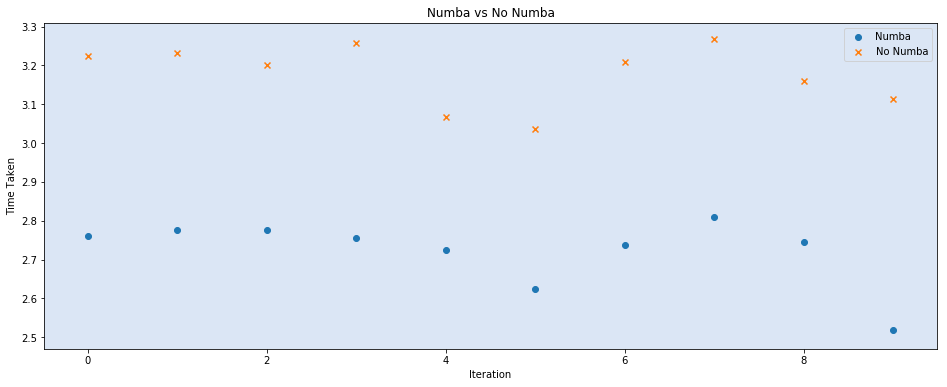

In [70]:
import matplotlib.pyplot as plt
time_numba_plot = plt.scatter([i for i in range(len(time_numba))],time_numba, marker = "o")
time_no_numba_plot = plt.scatter([i for i in range(len(time_numba))],time_no_numba, marker = "x")
plt.rcParams['axes.facecolor'] = "#dbe6f5"
plt.title("Numba vs No Numba")
plt.xlabel('Iteration')
plt.ylabel('Time Taken')
plt.legend((time_numba_plot , time_no_numba_plot),("Numba","No Numba"))
plt.rcParams["figure.figsize"] = [16,6]
plt.show()

In [71]:
print("fastest time of native package: ",min(time_no_numba))
print("fastest time of numba optimized package: ",min(time_numba))

fastest time of native package:  3.036407799999779
fastest time of numba optimized package:  2.5174777000001995


In [2]:
import numpy as np
import numba
from awkward_numba import JaggedArray
import random
import h5py
import awkward

In [11]:
# import random
# import awkward_numba
# from awkward_numba import JaggedArray
# def dataset_generator():
#     h5file = h5py.File("dataset{}.hdf5".format(random.randint(1000,10000000)),"w")
#     awkwd = awkward.hdf5(h5file)
#     for i in range(15):
#         jagged_array = awkward_numba.JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,10))]for _ in range(random.randint(-1,8))])
#         awkwd['jagged_array_{}'.format(i)] = jagged_array
#         print('jagged_array_{}'.format(i),jagged_array)
#     return h5file


# def dataset_reader(h5file,numba=True):
#     awkwd = awkward_numba.hdf5(h5file)
#     for key in h5file.keys():
#         if numba:
#             min = awkward_numba.JaggedArray._argminmax_general(awkwd[(key)], True)
#         else:
#             min = awkward_numba.JaggedArray._argminmax_general_native(awkwd[(key)], True)
#         print(key,": ",awkwd[(key)]," type: ",type(awkwd[(key)]))
#         print("/n argminmax",awkwd[(key)]._argminmax_general(True))
        

## Helper Functions used

In [2]:
## HELPFULL IMPORTS
import random
import awkward_numba
from awkward_numba import JaggedArray
import numpy as np
import numba
from awkward_numba import JaggedArray
import random
import h5py
import awkward

In [4]:
def dataset_generator():
    h5file = h5py.File("dataset{}.hdf5".format(random.randint(1000,10000000)),"w")
    print(h5file)
    awkwd = awkward_numba.hdf5(h5file)
    for i in range(1000):
        jagged_array = JaggedArray.fromiter([[random.randint(1,1000) for _ in range(random.randint(-1,10))]for _ in range(random.randint(-1,10000))])
        awkwd['jagged_array_{}'.format(i)] = jagged_array
        if(i%100==1):
            print(i)
    return h5file


def dataset_reader(h5file,numba=True):
    awkwd = awkward_numba.hdf5(h5file)
    count = 0
    for key in awkwd.keys():
        if numba:
            min = awkwd[(key)]._argminmax_general_numba(True)
        else:
            min = awkwd[(key)]._argminmax_general(True)
        
def benchmark_no_numba():
    data = dataset_generator()
    dataset_reader(data,numba=False)
    
def benchmark_numba():
    data = dataset_generator()
    dataset_reader(data,numba=True)
    